### CNN Model Classifying Fire & Non Fire    

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns

In [2]:
print(os.listdir("Datasets/Deep_Learning(Data)/Training Set/"))

['Fire', 'No_Fire']


In [ ]:
SIZE = 64

train_images = []
train_labels = [] 
for directory_path in glob.glob("Datasets/Deep_Learning(Data)/Training Set/*"):
    label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [48]:
train_labels

array(['Fire', 'Fire', 'Fire', ..., 'No_Fire', 'No_Fire', 'No_Fire'],
      dtype='<U7')

In [5]:
# test
test_images = []
test_labels = [] 
for directory_path in glob.glob("Datasets/Deep_Learning(Data)/Testing Set/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [6]:
test_labels

array(['Fire', 'Fire', 'Fire', ..., 'No_Fire', 'No_Fire', 'No_Fire'],
      dtype='<U7')

In [7]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [8]:
train_labels_encoded

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
test_labels_encoded

array([0, 0, 0, ..., 1, 1, 1])

In [10]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [11]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [12]:
#One hot encode y values for neural network. 
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [13]:
activation = 'sigmoid'

model = Sequential()
model.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())

In [14]:
#Add layers for deep learning prediction
x = model.output  
x = Dense(64, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(2, activation = 'softmax')(x)

In [15]:
cnn_model = Model(inputs=model.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary()) 

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)       

In [16]:
#Fit the model
history = cnn_model.fit(x_train, y_train_one_hot, epochs=5, validation_data = (x_test, y_test_one_hot))


Epoch 1/5
1706/1706 [==============================] - 919s 538ms/step - loss: 0.2099 - accuracy: 0.9167 - val_loss: 0.8445 - val_accuracy: 0.7368
Epoch 2/5
1706/1706 [==============================] - 945s 554ms/step - loss: 0.1027 - accuracy: 0.9617 - val_loss: 1.0837 - val_accuracy: 0.7186
Epoch 3/5
1706/1706 [==============================] - 1459s 855ms/step - loss: 0.0685 - accuracy: 0.9755 - val_loss: 1.2552 - val_accuracy: 0.7198
Epoch 4/5
1706/1706 [==============================] - 916s 537ms/step - loss: 0.0554 - accuracy: 0.9802 - val_loss: 1.2120 - val_accuracy: 0.7432
Epoch 5/5
1706/1706 [==============================] - 948s 556ms/step - loss: 0.0425 - accuracy: 0.9851 - val_loss: 0.9996 - val_accuracy: 0.7437


In [17]:
print("Test_Accuracy: {:.2f}%".format(cnn_model.evaluate(np.array(x_test), np.array(y_test_one_hot))[1]*100))

409/409 [==============================] - 40s 97ms/step - loss: 0.9996 - accuracy: 0.74371s - los
Test_Accuracy: 74.37%


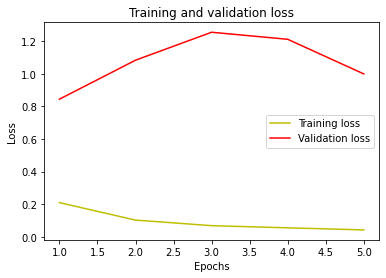

In [18]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

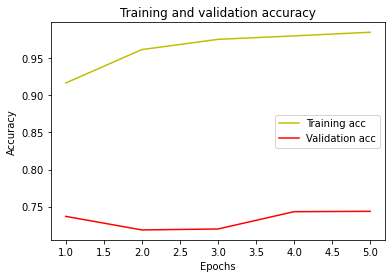

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

[[8522 1478]
 [1869 1188]]


<AxesSubplot:>

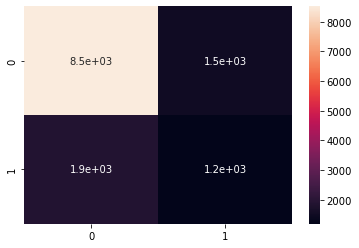

In [21]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True)

In [51]:
#Save the model
cnn_model.save('Fire&NoFire_cnn(2).h5')

The prediction for this image is:  ['No_Fire']
The actual label for this image is:  No_Fire


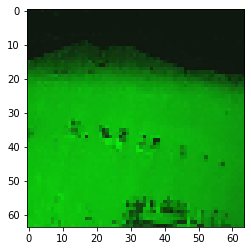

In [52]:
#Check results on a few select images

#n=15 Fire
n=12319                                                 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)                 #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))    #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])         #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

----------------------------------------------------------------------------------------------------------

In [53]:
from tensorflow import keras
model = keras.models.load_model('Fire&NoFire_cnn(2).h5')

### Testing Model on new data

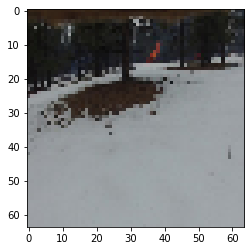

No Fire


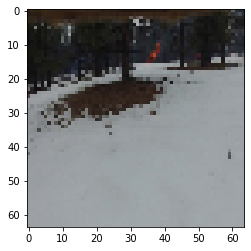

No Fire


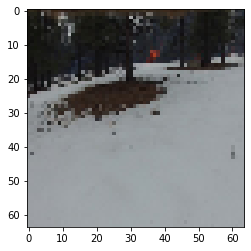

Fire


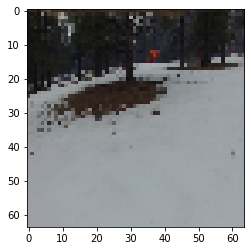

Fire


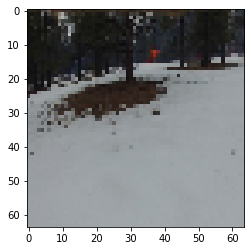

Fire


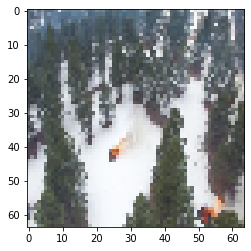

Fire


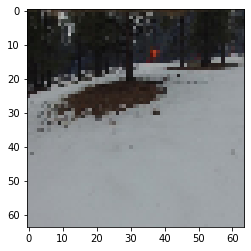

Fire


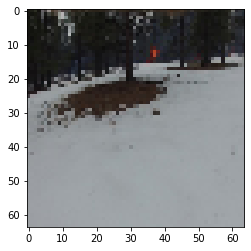

Fire


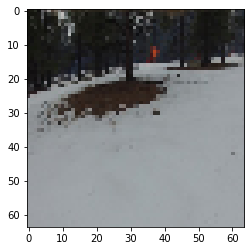

Fire


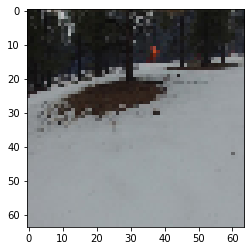

Fire


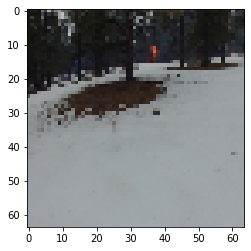

Fire


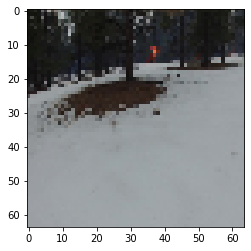

Fire


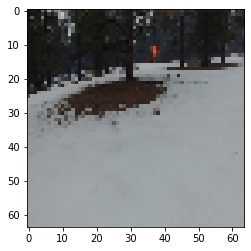

Fire


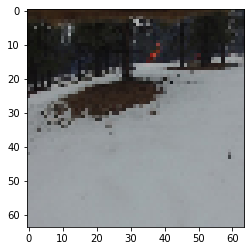

No Fire


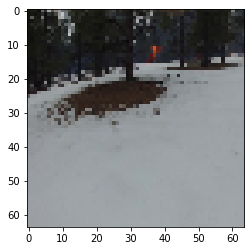

Fire


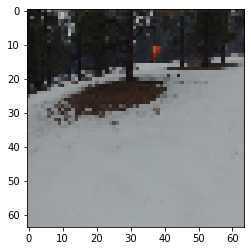

Fire


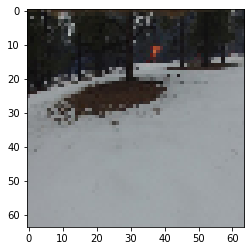

Fire


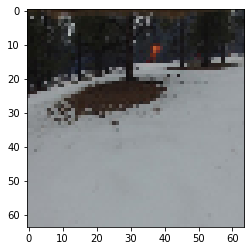

Fire


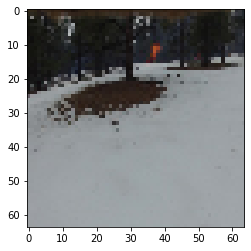

Fire


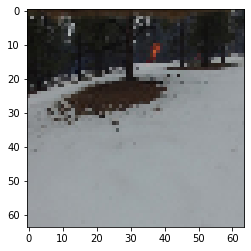

Fire


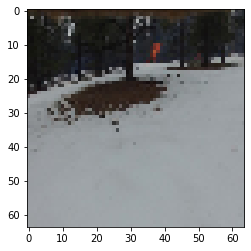

Fire


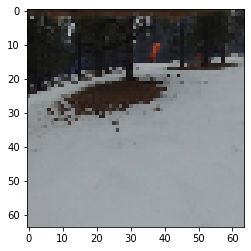

No Fire


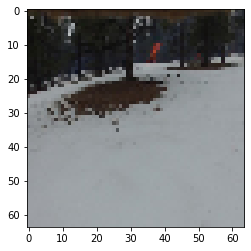

No Fire


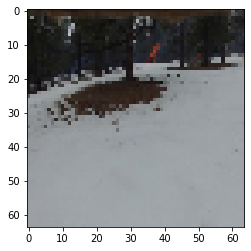

No Fire


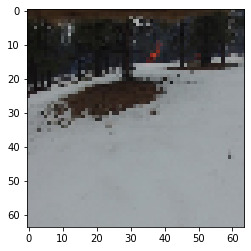

No Fire


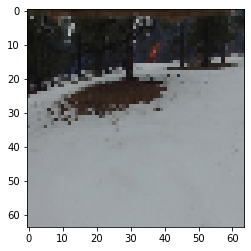

Fire


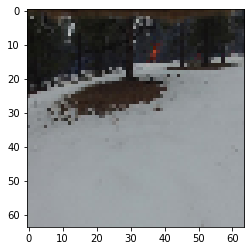

No Fire


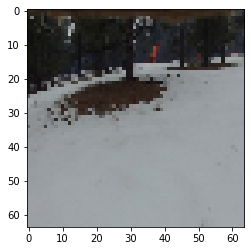

No Fire


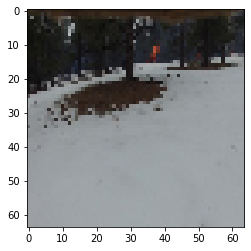

No Fire


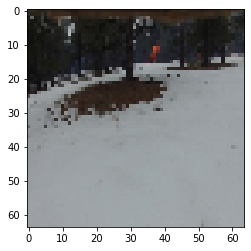

Fire


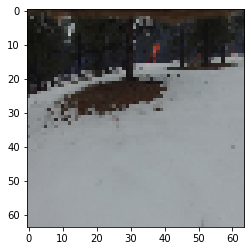

Fire


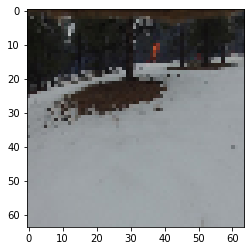

Fire


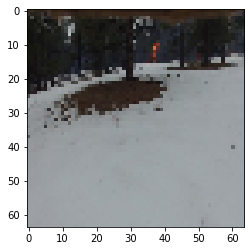

Fire


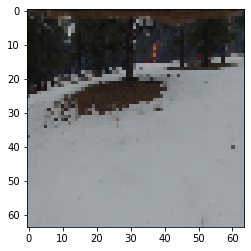

Fire


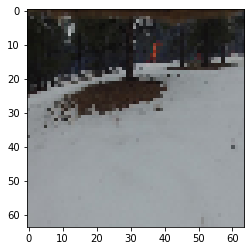

Fire


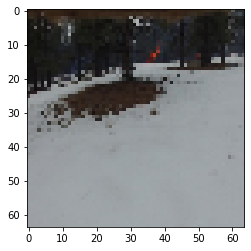

No Fire


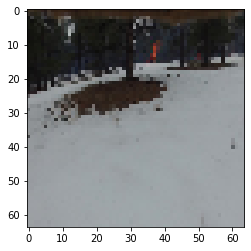

No Fire


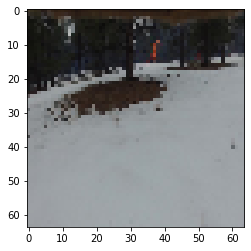

No Fire


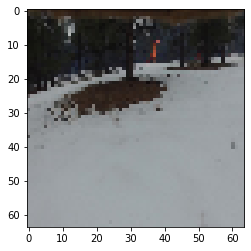

No Fire


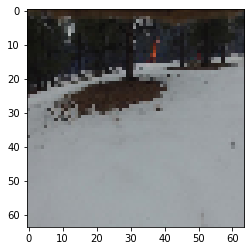

No Fire


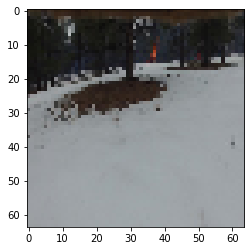

Fire


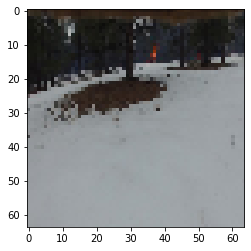

No Fire


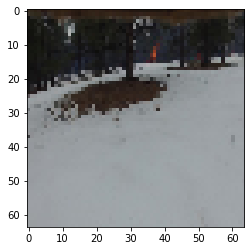

No Fire


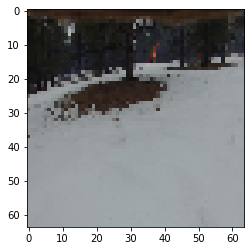

No Fire


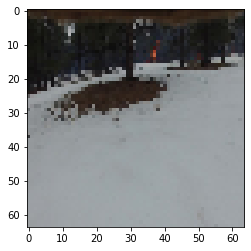

No Fire


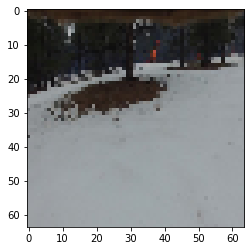

No Fire


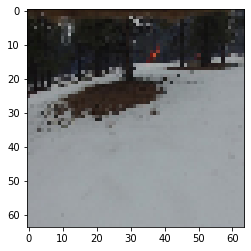

No Fire


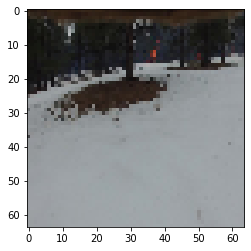

No Fire


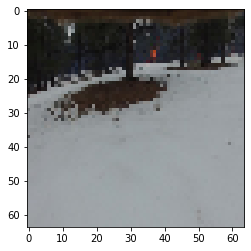

No Fire


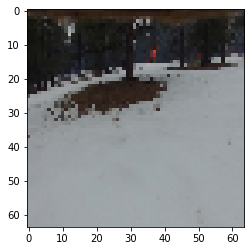

No Fire


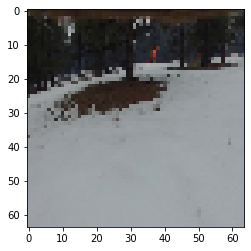

Fire


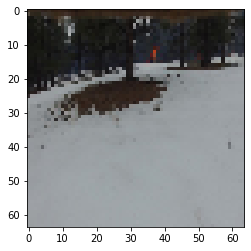

No Fire


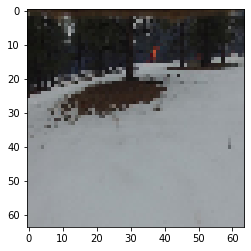

No Fire


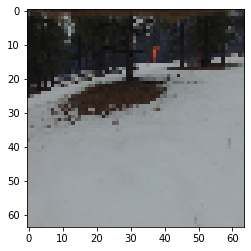

No Fire


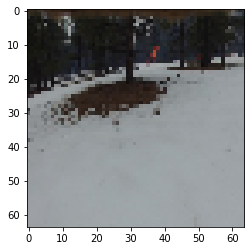

No Fire


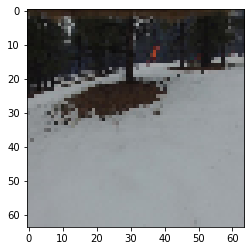

No Fire


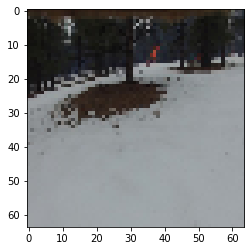

Fire


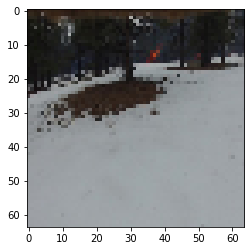

No Fire


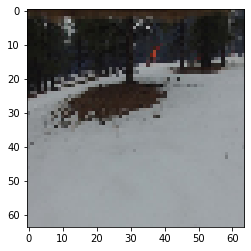

No Fire


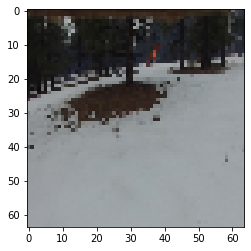

No Fire


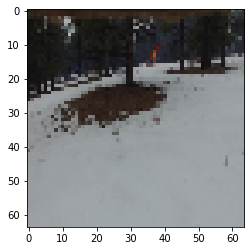

No Fire


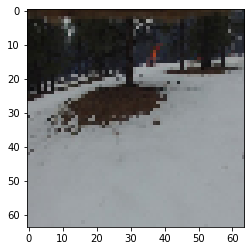

No Fire


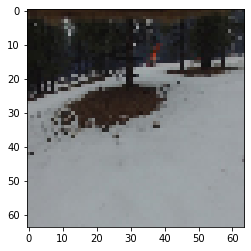

No Fire


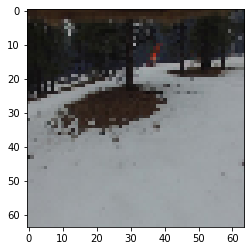

No Fire


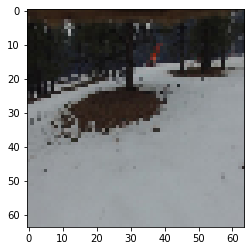

No Fire


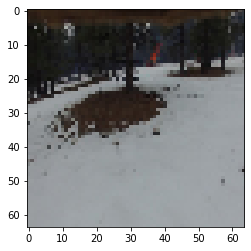

No Fire


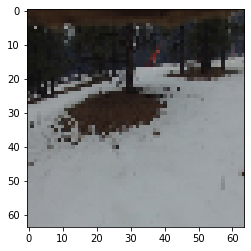

No Fire


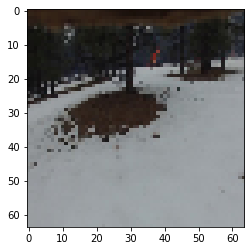

No Fire


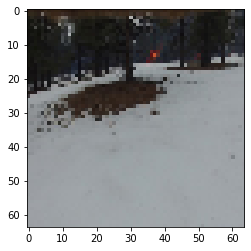

No Fire


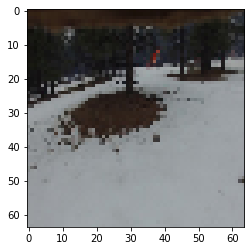

No Fire


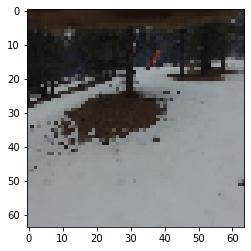

No Fire


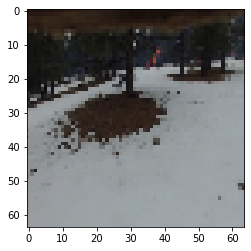

No Fire


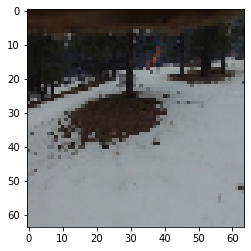

No Fire


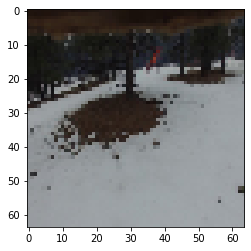

No Fire


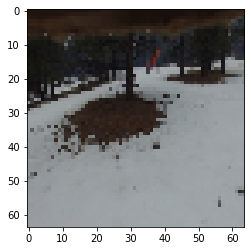

No Fire


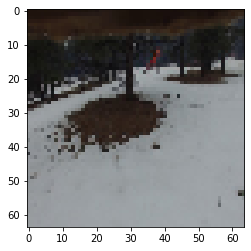

No Fire


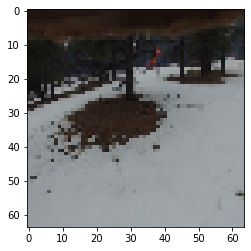

No Fire


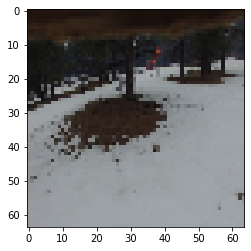

No Fire


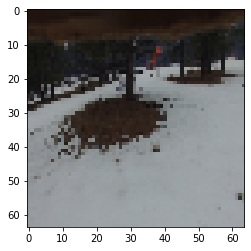

No Fire


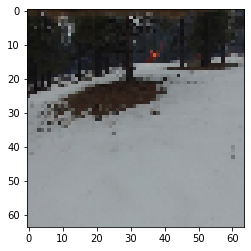

No Fire


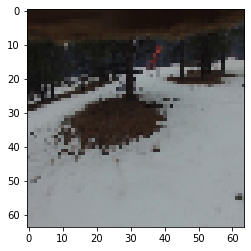

No Fire


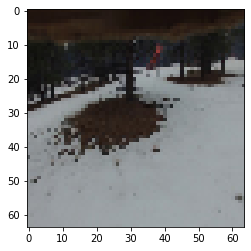

No Fire


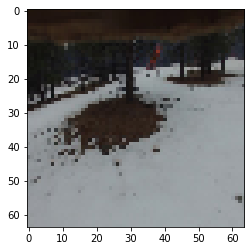

No Fire


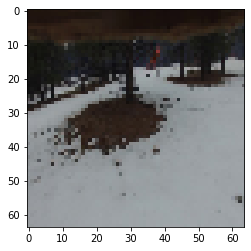

No Fire


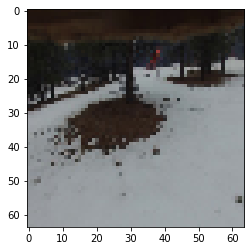

No Fire


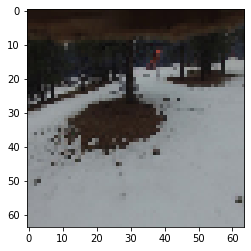

No Fire


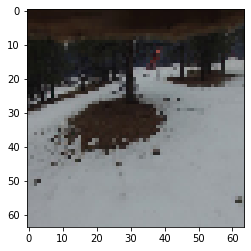

No Fire


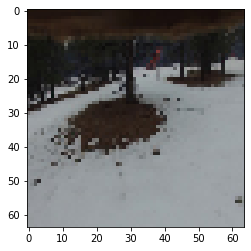

No Fire


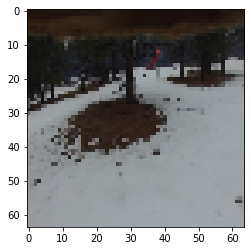

No Fire


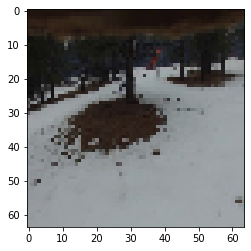

No Fire


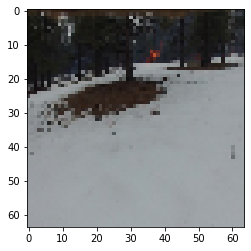

Fire


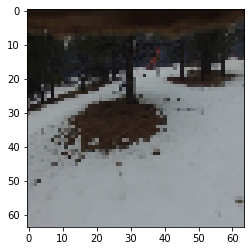

No Fire


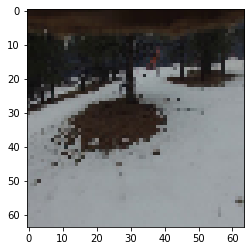

No Fire


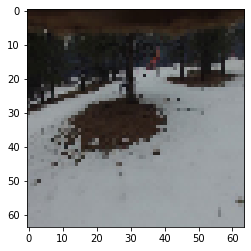

No Fire


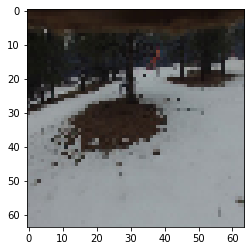

No Fire


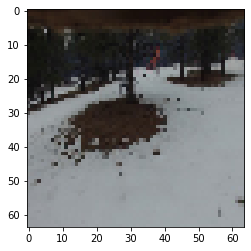

No Fire


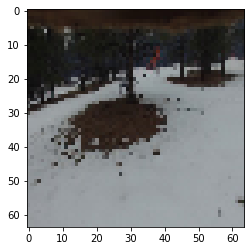

No Fire


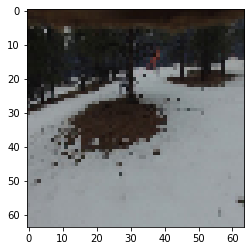

No Fire


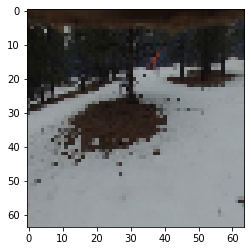

No Fire


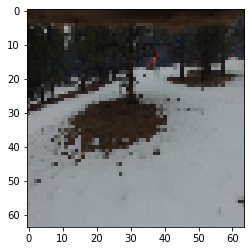

No Fire
 
Fire Images: 29
No Fire Images: 71


In [73]:
from keras.preprocessing import image

image_directory = "Datasets/Deep_Learning(Data)/New/Fire/"
firecount=0
nofirecount=0
for i in os.listdir(image_directory):
    img = image.load_img(image_directory+'//'+i,target_size=(64,64))
    plt.imshow(img)
    img = image.img_to_array(img)
    input_img = np.expand_dims(img, axis=0)
    val = model.predict(input_img)  
    plt.show() 
    if(val[0][0]>val[0][1]):
        print("No Fire")
        nofirecount+=1
    else:
        print("Fire")
        firecount+=1
print(' ')
print("Fire Images:",firecount)
print("No Fire Images:",nofirecount)

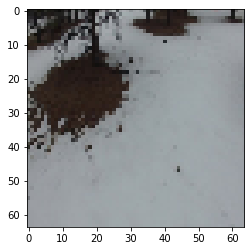

No Fire


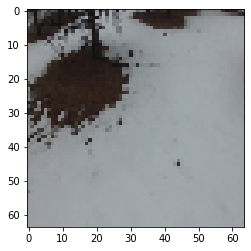

No Fire


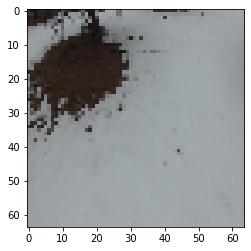

No Fire


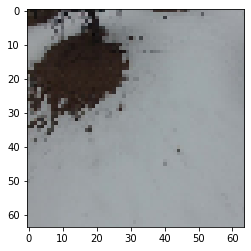

No Fire


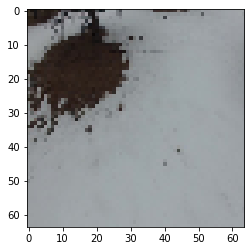

No Fire


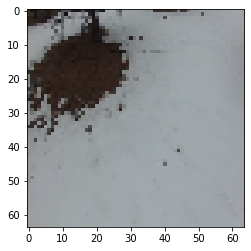

No Fire


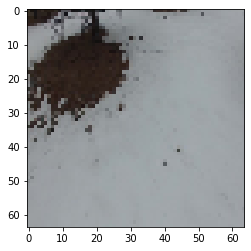

No Fire


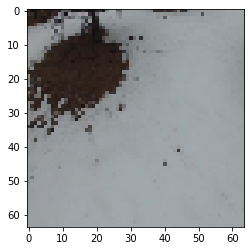

No Fire


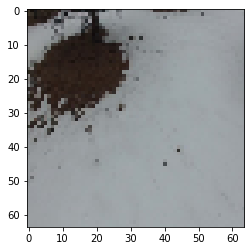

No Fire


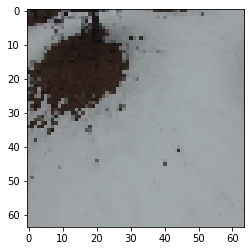

No Fire


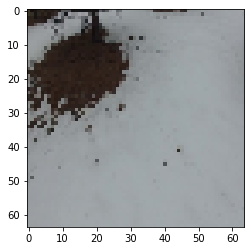

No Fire


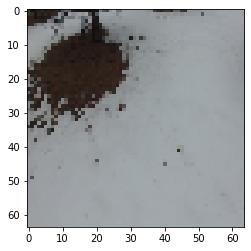

No Fire


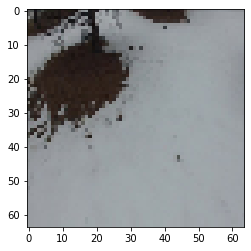

No Fire


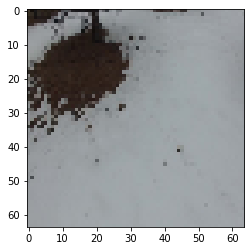

No Fire


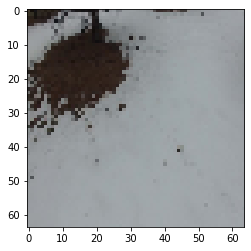

No Fire


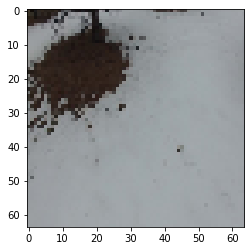

No Fire


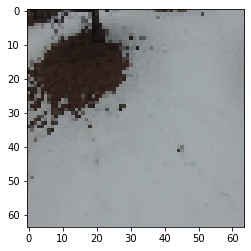

No Fire


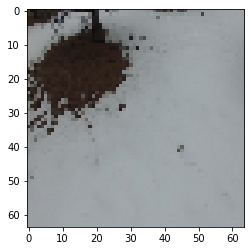

No Fire


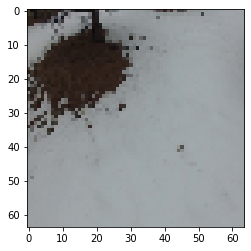

No Fire


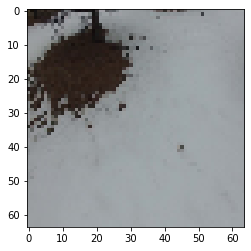

No Fire


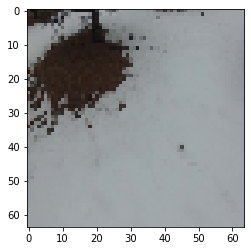

No Fire


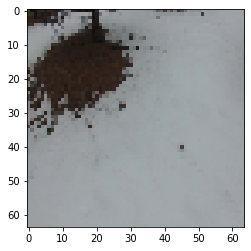

No Fire


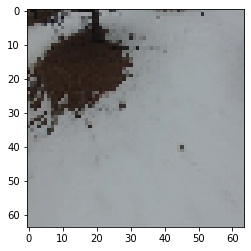

No Fire


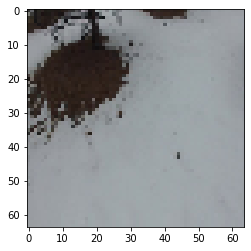

No Fire


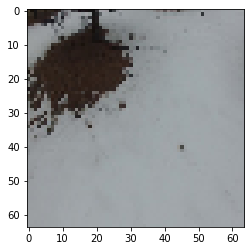

No Fire


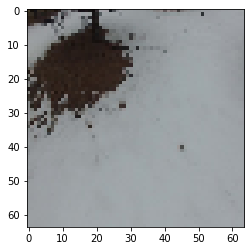

No Fire


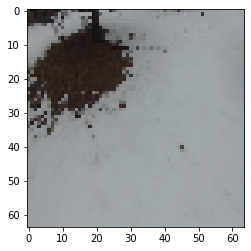

No Fire


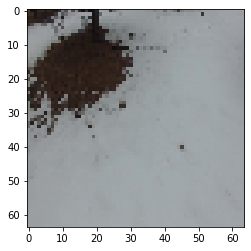

No Fire


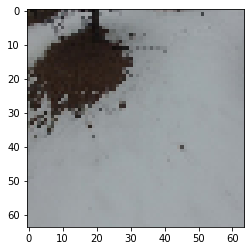

No Fire


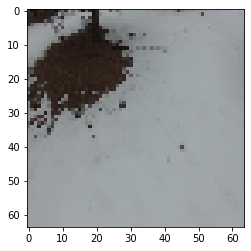

No Fire


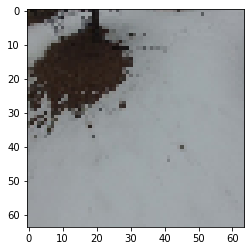

No Fire


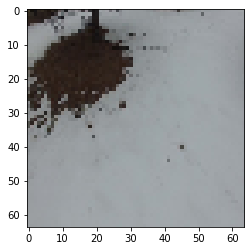

No Fire


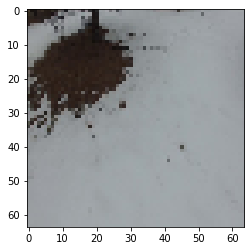

No Fire


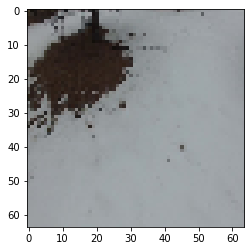

No Fire


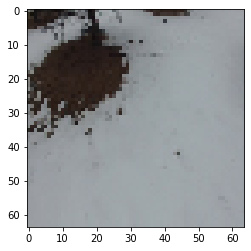

No Fire


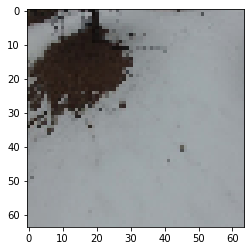

No Fire


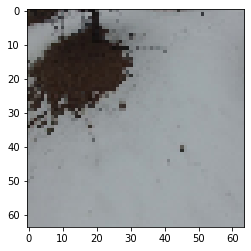

No Fire


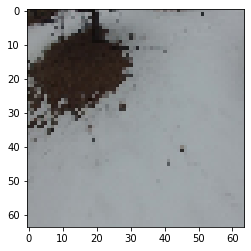

No Fire


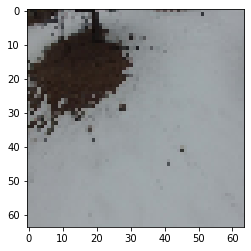

No Fire


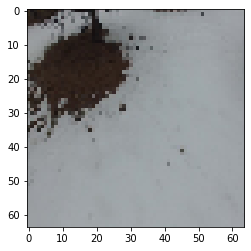

No Fire


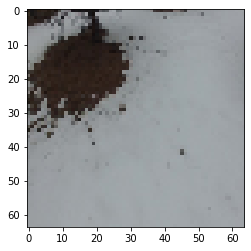

No Fire


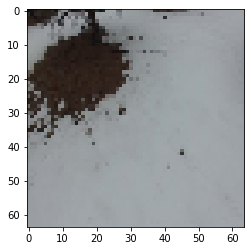

No Fire


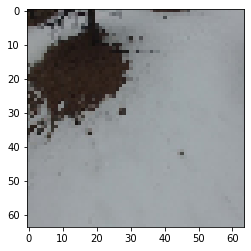

No Fire


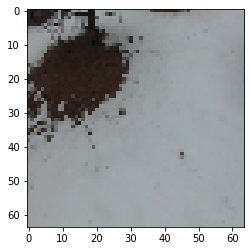

No Fire


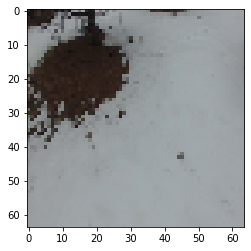

No Fire


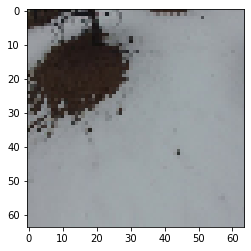

No Fire


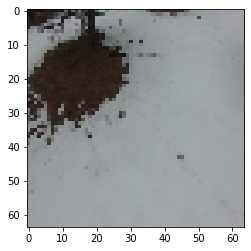

No Fire


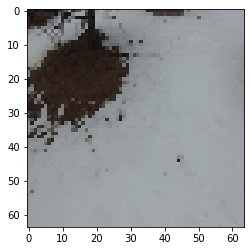

No Fire


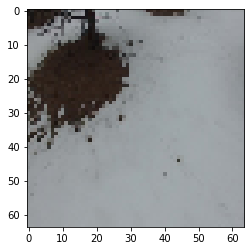

No Fire


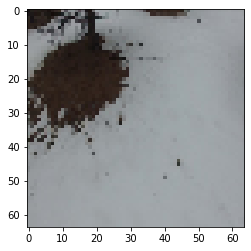

No Fire


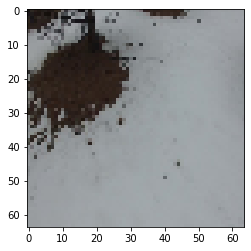

No Fire


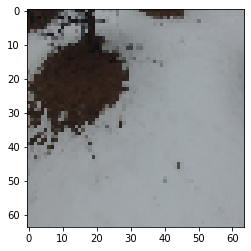

No Fire


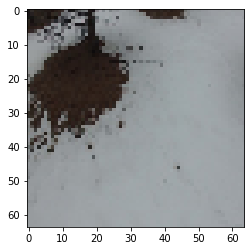

No Fire


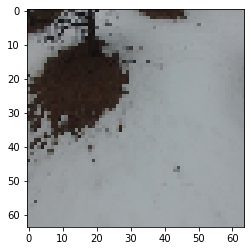

No Fire


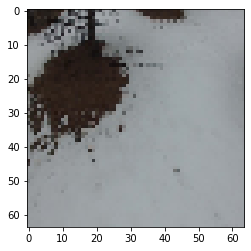

No Fire


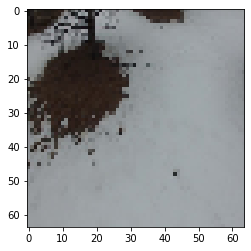

No Fire


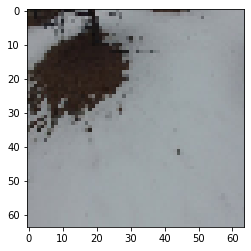

No Fire


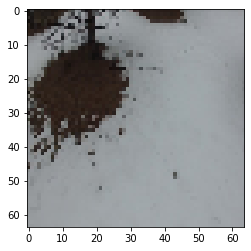

No Fire


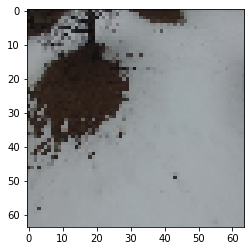

No Fire


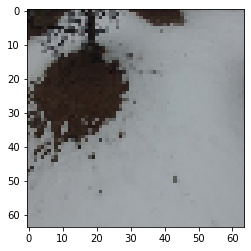

No Fire


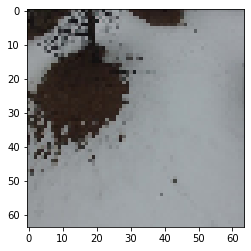

No Fire


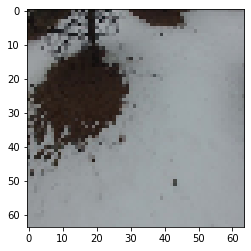

No Fire


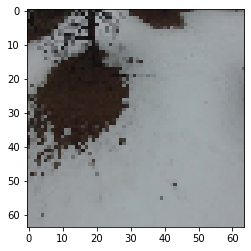

No Fire


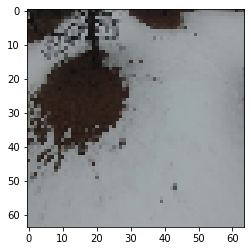

No Fire


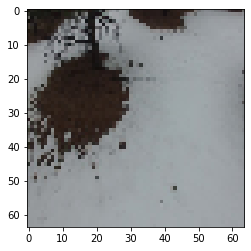

No Fire


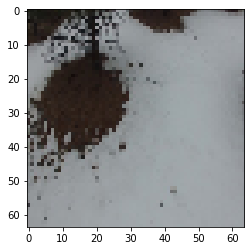

No Fire


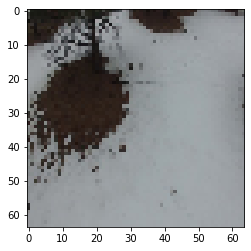

No Fire


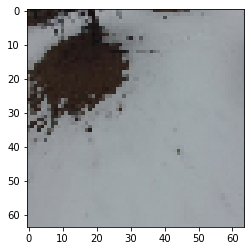

No Fire


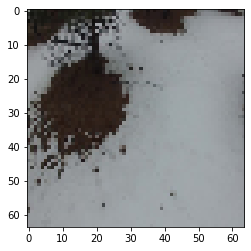

No Fire


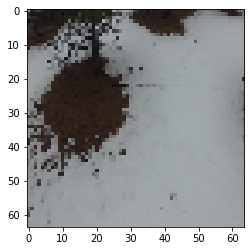

No Fire


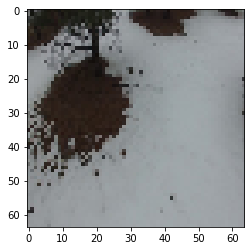

No Fire


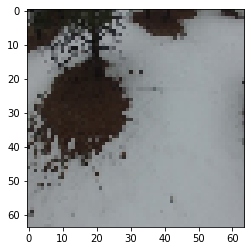

No Fire


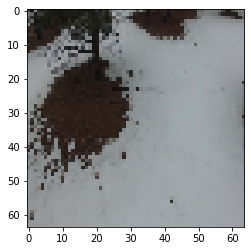

No Fire


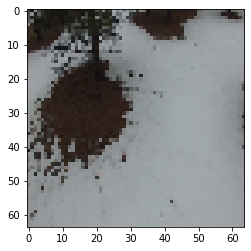

No Fire


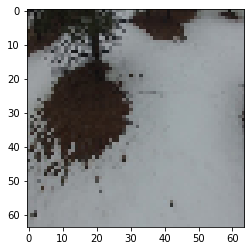

No Fire


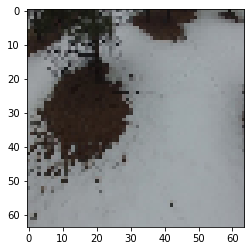

No Fire


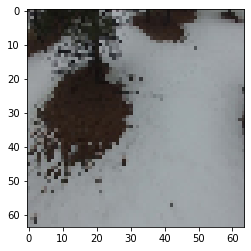

No Fire


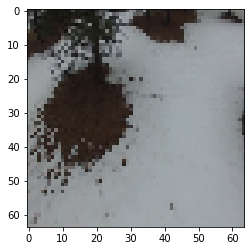

Fire


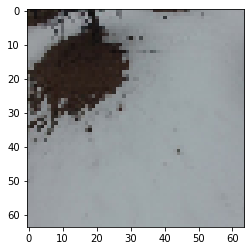

No Fire


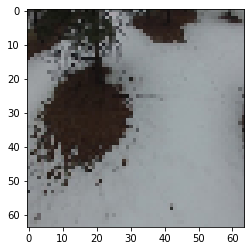

No Fire


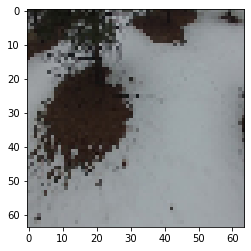

No Fire


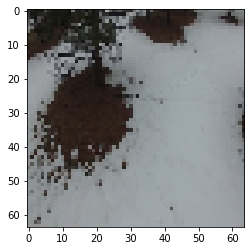

No Fire


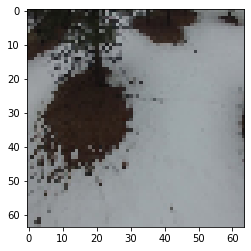

Fire


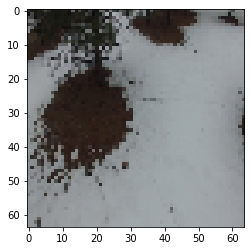

No Fire


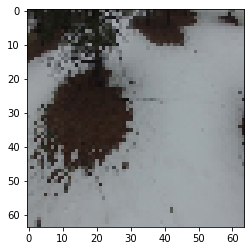

No Fire


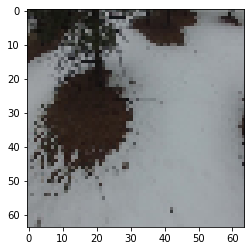

No Fire


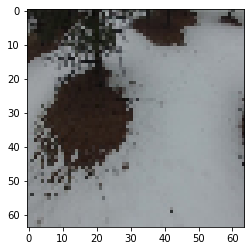

No Fire


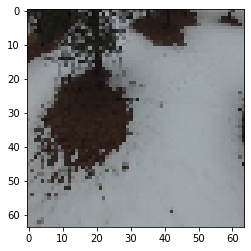

No Fire


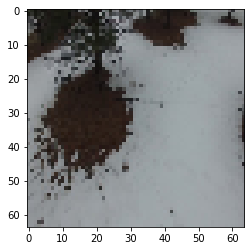

No Fire


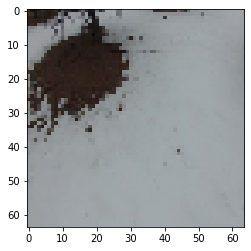

No Fire


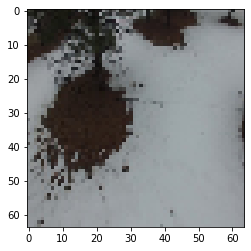

No Fire


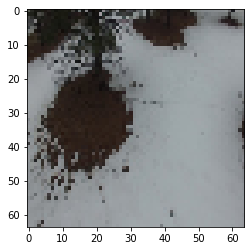

No Fire


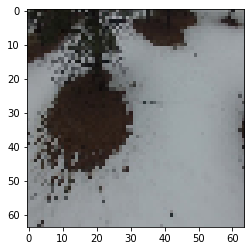

No Fire


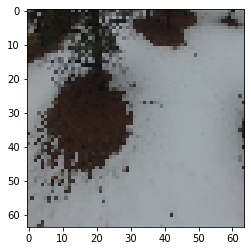

No Fire


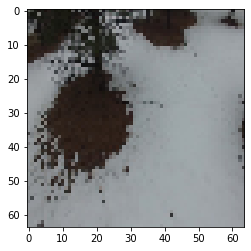

No Fire


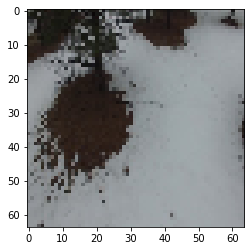

No Fire


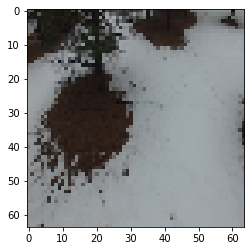

No Fire


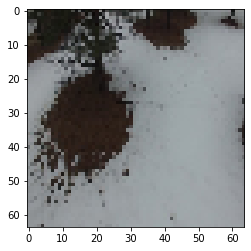

No Fire


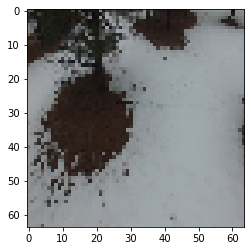

No Fire


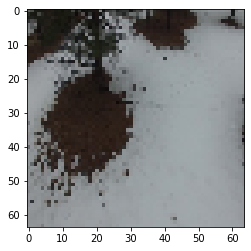

No Fire
 
Fire Images: 2
No Fire Images: 98


In [72]:
from keras.preprocessing import image

image_directory = "Datasets/Deep_Learning(Data)/New/No_fire/"
firecount=0
nofirecount=0
for i in os.listdir(image_directory):
    img = image.load_img(image_directory+'//'+i,target_size=(64,64))
    plt.imshow(img)
    img = image.img_to_array(img)
    input_img = np.expand_dims(img, axis=0)
    val = model.predict(input_img)  
    plt.show() 
    if(val[0][0]>val[0][1]):
        print("No Fire")
        nofirecount+=1
    else:
        print("Fire")
        firecount+=1
print(' ')
print("Fire Images:",firecount)
print("No Fire Images:",nofirecount)